# Historical Donor Data Analysis 

**Who**
All individual donors who gave to the c3 recorded in NGP, minus monthly donors. We have  
We’re working with 2,329 donors in this analysis.

**Approach**
This is what I would call an “exploratory data analysis.” My goal here was to simply understand or donor data and start asking questions. Like every good analysis, I wound up with more questions than I was able to answer.   

**I started my analysis by asking the questions:**  
How many of our donors give below \\$100? Below \\$500? Below \\$1,000?  
What’s the average lifetime value of our donors?  
How many of our donors give once and then never again?  
Who loves us the most (donors with the most gifts)?  


In [87]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
datetime.datetime.strptime

%matplotlib inline

In [2]:
# read in the data for the c4 and the c3
c3 = pd.read_csv("data/all_c3_donors.Csv")
c4 = pd.read_csv("data/all_c4_donors.csv")

# Data Cleaning  

I just joined this organization and had never touched their data before, so I had no idea what I was getting myself into. I had a vague understanding that our data were messy, incomplete, and just plain bad, so I decided to poke around and see for myself.

## The Data  

We start, as always, by reading in the data and taking a look. Since you are reading this over the Internet, I have made the donor data anonymous.

In [56]:
# Let's make the donors anonymous 
c3_small = c3.iloc[:,[2,3,11]]
c3_small.columns = ['date', 'amount', 'name']
c3_small["name"] = c3_small["name"].astype('category').cat.codes
c3_small.head(10)

/home/thebbennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,amount,name
0,06/15/2013,25.0,1901
1,07/08/2011,2000.0,4113
2,09/03/2013,25.0,4183
3,10/11/2013,100.0,1967
4,09/03/2013,25.0,1974
5,09/03/2013,10.0,2005
6,09/13/2013,1.0,2029
7,05/15/2014,10.0,2146
8,08/26/2014,10.0,2146
9,09/02/2013,5.0,4368


The above table lists individual donations by transaction date, but as a fundraiser I'm interested in donors themselves. I grouped the data above my name and summed their total contribution amounts to get their "lifetime value."

In [57]:
# What are the lifetime amounts of our top donors?
donors_by_lifetime = c3_small.groupby(['name'])['amount'].sum().sort_values(ascending = False).to_frame()
donors_by_lifetime.columns = ['lifetime_amount']
donors_by_lifetime.head(15)

,lifetime_amount
name,
4422,301000.0
674,50000.0
5781,50000.0
6975,35500.0
814,35000.0
6981,35000.0
3538,30555.0
1457,26100.0
6094,25000.0


I was told that my org championed an international Indiegogo campaign that garnered 6,000+ donors. While this is awesome, as a fundraise I know this will heavily skew our retention rates. I know that we really only have 2,000 or so active donors, so carrying around 6,000 one-time donors we'll never be able to contact again isn't useful for our work.  

The only issue is, I had no idea how these donors were coded into our database, if at all.  

But before we begin, let's see what the distribution is for all giving.

In [58]:
# create a separate dataframe for small dollar donors
sub_100 = donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] <= 100]

[Text(0,0.5,'Frequency'), Text(0.5,0,'Lifetime Value ($)')]

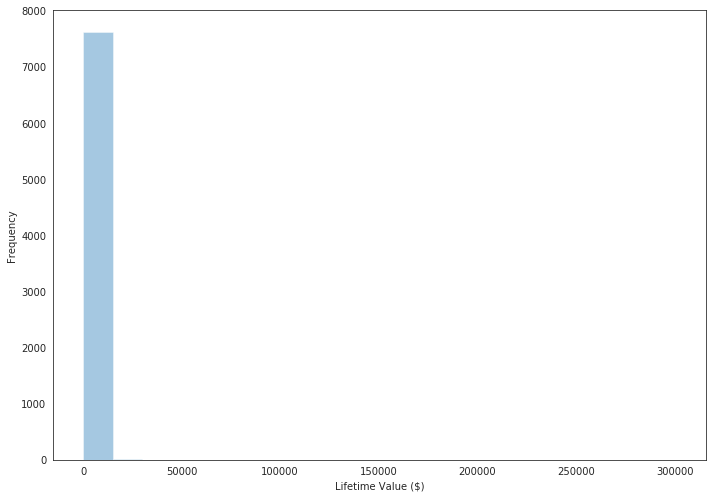

In [59]:
# Plot a histogram of all donor lifetime value, for the heck of it
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_style('white')

sns.distplot(donors_by_lifetime['lifetime_amount'], bins = 20, kde = False)
ax.set(xlabel='Lifetime Value ($)', ylabel='Frequency')


No matter the number of bins, this graph looks the same. We overwhelmingly have small dollar gifts in this unclean data set. 

Let's look only at small dollar donors (donors with lifetime values under \\$100)

[Text(0,0.5,'Frequency'), Text(0.5,0,'Lifetime Value ($)')]

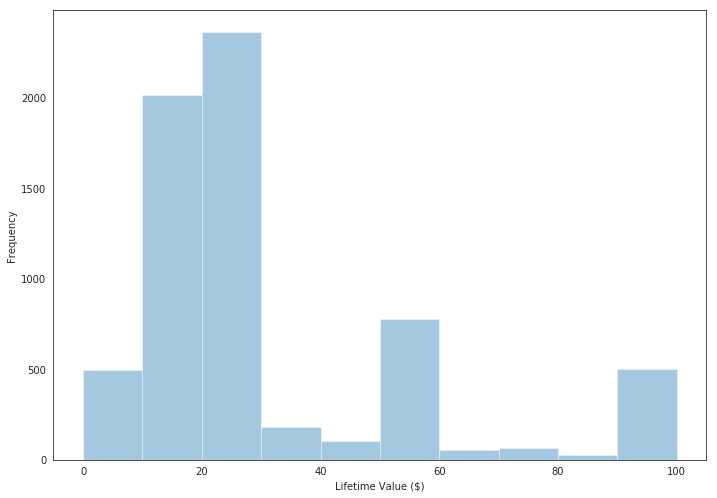

In [60]:
# Plot a histogram of small dollar donors and their lifetime values
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_style('white')
#sns.set_context("poster")

sns.distplot(sub_100['lifetime_amount'], bins = 10, kde = False)
ax.set(xlabel='Lifetime Value ($)', ylabel='Frequency')


In [61]:
sub_100.loc[sub_100['lifetime_amount'] >= 25].count()

lifetime_amount    3677
dtype: int64

In [62]:
donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] == 25].count()/len(donors_by_lifetime)

lifetime_amount    0.255166
dtype: float64

With a zoomed in data set, we see that we have thousands of donors with lifetime values \\$25 or below -- 3,677 of them (or 25.5\%!) in fact. I bet that these are our Indiegogo folk, so let's look at removing these donor from the analysis.

## Removing the One Time Indiegogo Folk

We start by making a fresh, clean dataframe and calling it "c3_clean". This definitely won't become cumbersome later on.  



In [63]:
c3_clean = c3
c3_clean[" Contact Name"] = c3_clean[" Contact Name"].astype('category').cat.codes
c3_clean = c3_clean.set_index(" Contact Name")


In [64]:
c3_clean["Received On"] = pd.to_datetime(c3_clean["Received On"])


In [66]:
c3_clean.columns

Index(['Count', 'Contribution ID', 'Received On', 'Amount', 'Designation',
       'Contribution Type', 'Cycle', 'Period', 'Contribution.Note',
       ' Source Code Path', ' Contact ID'],
      dtype='object')

By plotting the gifts over time, we easily spoot the Indiegogo campaign: 2013. Let's zero in on that year.

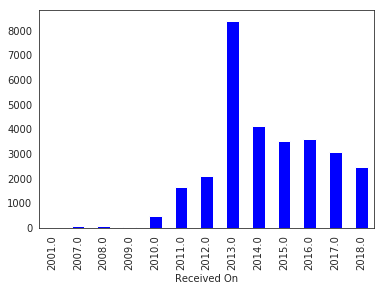

In [86]:
c3_clean.groupby(c3_clean["Received On"].dt.year).Amount.count().plot(kind="bar", color = 'blue')


We can plot a bar graph of 2013 once we've segmented out the 2013 donors.

In [88]:
donors_2013 = c3_clean[c3_clean['Received On'].apply(lambda x: x.year == 2013)]


Bingo. The crowdfunding campaign occured in September of 2013.

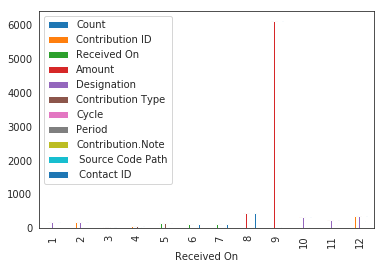

In [15]:
donors_2013.groupby(donors_2013["Received On"].dt.month).count().plot(kind="bar")


There were a whopping 6,128 donors during the Indiegogo campaign! We can now filter out these donors from the original dataframe to build our c3_clean dataframe.

In [16]:
indiegogo = donors_2013[donors_2013['Received On'].apply(lambda x: x.month == 9)]
len(indiegogo)

6128

In [18]:
i1 = c3_clean.index
i2 = indiegogo.index
c3_clean = c3_clean[~i1.isin(i2)]


# Data Analysis


## Distirbution of Lifetime Amounts

In [19]:
donors_by_lifetime = c3_clean.groupby([' Contact Name'])['Amount'].sum().sort_values(ascending = False).to_frame()
donors_by_lifetime.columns = ['lifetime_amount']
donors_by_lifetime.head(15)

,lifetime_amount
Contact Name,
4421,301000.0
673,50000.0
5780,50000.0
6974,35500.0
6980,35000.0
813,35000.0
1456,26100.0
6093,25000.0
3058,25000.0


In [20]:
donors_100_1000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 100) & (donors_by_lifetime["lifetime_amount"] <= 1000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


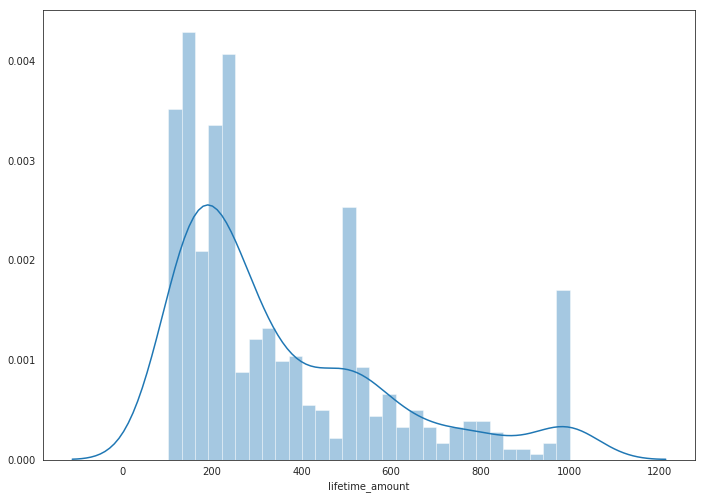

In [21]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_100_1000['lifetime_amount'], bins = 30)

In [22]:
donors_900_10000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 900) & (donors_by_lifetime["lifetime_amount"] <= 10000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


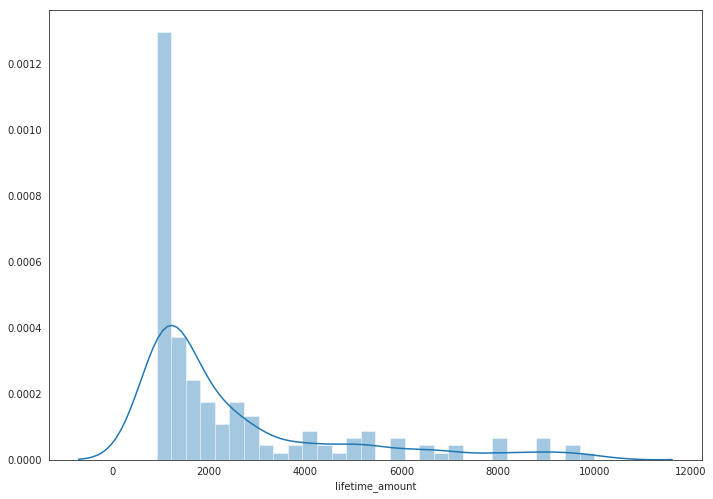

In [23]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_900_10000['lifetime_amount'], bins = 30)

## Quick Check on Lifetime Amounts  

8.8% of donors have a lifetime value of \\$1,000 or more. Given our definition of a major donor being someone who have given \\$1,000 or more, this means that 91% of our donors are small dollar donors.

In [24]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] == 1000)].count()/len(donors_by_lifetime)

lifetime_amount    0.013474
dtype: float64

In [25]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] >= 1000)].count()/len(donors_by_lifetime)

lifetime_amount    0.07796
dtype: float64

## Removing monthly donors

In [26]:
c3_clean.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
4112,NaN,VNW16CGKCY8,2011-07-08,2000.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHGYZ0
1966,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
4716,NaN,VNW16E3PPR3,2015-12-22,2500.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGJ1973
4793,NaN,VNW16CGFH74,2008-02-07,21.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH3992
1932,NaN,VNW16CGDHA2,2007-03-21,50.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH2VW2


In [27]:
monthly_gifts = c3_clean[c3_clean[' Source Code Path'].str.contains("Player") == True]
monthly_gifts.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
3344,NaN,VNW16EPKCJ9,2016-08-15,5.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/Player contribution,VNX0EGHJ7D6
3903,NaN,VNW16E2V624,2015-11-15,5.0,New Era Colorado Foundation,Monetary Contribution,NaN,Primary,NaN,c3 Donors/Player contribution,VNX0EGH8D82
3353,NaN,VNW16DM0RJ5,2015-02-15,5.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/Player contribution,VNX0EGJ17E3
3353,NaN,VNW16DQ6KD7,2015-05-15,5.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/Player contribution,VNX0EGJ17E3
3353,NaN,VNW16DN7177,2014-12-15,5.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/Player contribution,VNX0EGJ17E3


In [28]:
no_monthly = pd.concat([c3_clean, monthly_gifts]).drop_duplicates(keep=False)
no_monthly.head(10)

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
4112,NaN,VNW16CGKCY8,2011-07-08,2000.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHGYZ0
1966,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
4716,NaN,VNW16E3PPR3,2015-12-22,2500.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGJ1973
4793,NaN,VNW16CGFH74,2008-02-07,21.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH3992
1932,NaN,VNW16CGDHA2,2007-03-21,50.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH2VW2
1932,NaN,VNW16CGPRJ0,2013-05-03,200.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH2VW2
2043,NaN,VNW16CGJTH8,2013-10-07,50.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHJ7M1
1844,NaN,VNW16CXR3A8,2014-03-20,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHNNA7
1844,NaN,VNW16CGQDJ6,2013-04-21,40.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHNNA7


# Repeating the analysis, minus monthly members
## By Gift Count

In [29]:
no_monthly_by_gifts = no_monthly.groupby([' Contact Name']).size().sort_values(ascending = False).to_frame()
no_monthly_by_gifts.columns = ['number_of_gifts']
no_monthly_by_gifts.head(15)

,number_of_gifts
Contact Name,
3086,77
1627,57
4243,54
5923,53
1487,53
7299,52
6570,51
629,49
6571,48


## By Lifetime Value

In [30]:
no_monthly_by_lifetime = no_monthly.groupby([' Contact Name'])['Amount'].sum().sort_values(ascending = False).to_frame()
no_monthly_by_lifetime.columns = ['lifetime_amount']
no_monthly_by_lifetime.head(15)

,lifetime_amount
Contact Name,
4421,301000.0
673,50000.0
5780,50000.0
6974,35500.0
813,35000.0
6980,35000.0
1456,26100.0
3058,25000.0
6093,25000.0


In [31]:
### Summary Stats

In [32]:
len(no_monthly_by_gifts)

1898

In [33]:
np.mean(no_monthly_by_gifts)

number_of_gifts    3.382508
dtype: float64

In [34]:
np.mean(no_monthly["Amount"])

195.87004985200193

In [35]:
no_monthly["Amount"].median()

15.0

In [36]:
np.mean(no_monthly_by_lifetime["lifetime_amount"])

662.4287934668072

In [37]:
no_monthly_by_lifetime.median()

lifetime_amount    50.0
dtype: float64

In [38]:
max(no_monthly["Amount"])

100000.0

In [39]:
len(no_monthly_by_lifetime.loc[no_monthly_by_lifetime["lifetime_amount"] <= 50])/len(no_monthly_by_lifetime)

0.5389884088514225

We have **2,142 non monthly donors**.  
The average number of lifetime gifts is 4.6.  
The median lifetime amount is \\$50  
The average gift amount is \\$140  
The median gift amount is \\$10.0  
The average lifetime value of our donors is \\$646.37.   
The highest gift we ever received was for \\$100,000!  
**51.6% of donors have a lifetime value of \\$50 or below.**

In [40]:
no_monthly_by_lifetime.describe()

,lifetime_amount
count,1898.000000
mean,662.428793
std,7426.555598
min,0.000000
25%,25.000000
50%,50.000000
75%,150.750000
max,301000.000000


## Repeat Donors (non monthly)

In [41]:
no_monthly_by_gifts.loc[no_monthly_by_gifts['number_of_gifts'] == 1].count()

number_of_gifts    1254
dtype: int64

In [42]:
no_monthly_by_gifts.loc[no_monthly_by_gifts['number_of_gifts'] == 1].count()/len(no_monthly_by_gifts)

number_of_gifts    0.660695
dtype: float64

61.4% of New Era's donors only give once!

In [43]:
repeat_donors = no_monthly_by_gifts.loc[no_monthly_by_gifts['number_of_gifts'] != 1]

In [44]:
len(repeat_donors)

644

In [45]:
repeat_donors.head(10)

,number_of_gifts
Contact Name,
3086,77
1627,57
4243,54
5923,53
1487,53
7299,52
6570,51
629,49
6571,48


/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


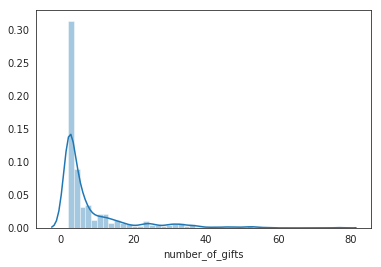

In [46]:
sns.distplot(repeat_donors['number_of_gifts'])

In [47]:
repeat_donors_zoom = no_monthly_by_gifts.loc[(no_monthly_by_gifts['number_of_gifts'] > 1) & (no_monthly_by_gifts['number_of_gifts'] < 50)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


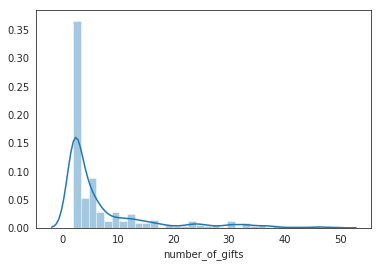

In [48]:
sns.distplot(repeat_donors_zoom['number_of_gifts'])

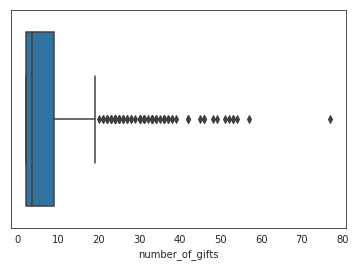

In [49]:
ax = sns.boxplot(x=repeat_donors["number_of_gifts"])

In [50]:
repeat_donors.describe()

,number_of_gifts
count,644.000000
mean,8.021739
std,10.356904
min,2.000000
25%,2.000000
50%,3.500000
75%,9.000000
max,77.000000


In [51]:
i1 = no_monthly.index
i2 = repeat_donors.index
len(no_monthly[~i1.isin(i2)])


1254

New Era has 826 donors that have given more than 1 gift (compared to 1,316 that have only given once). The average 